In [18]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense
from keras.applications.vgg19 import VGG19
import numpy as np
import os
import matplotlib.pyplot as plt
from glob import glob
import cv2

In [19]:
train_dir = "/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı/Train"
test_dir = "/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı/Test"

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
numberOfClass = len(glob(train_dir + "/*"))

In [22]:
import tensorflow as tf

In [23]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2024-07-23 13:58:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-07-23 13:58:25 (127 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [24]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir


In [25]:
import os

for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı'.
There are 3 directories and 0 images in '/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı/Train'.
There are 0 directories and 680 images in '/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı/Train/Normal'.
There are 0 directories and 596 images in '/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı/Train/Malignant'.
There are 0 directories and 527 images in '/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı/Train/Benign'.
There are 3 directories and 0 images in '/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı/Test'.
There are 0 directories and 60 images in '/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı/Test/Benign'.
There are 0 directories and 66 images in '/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı/Test/Malignant'.
There are 0 directories and 77 images in '/content/drive

In [26]:
import tensorflow as tf
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
train_data= tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                          label_mode= "categorical",
                                                          batch_size=BATCH_SIZE,
                                                          image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                          label_mode="categorical",
                                                          batch_size=BATCH_SIZE,
                                                          image_size=IMG_SIZE)

Found 1803 files belonging to 3 classes.
Found 203 files belonging to 3 classes.


In [27]:
train_data.class_names

['Benign', 'Malignant', 'Normal']

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import random
import math
import csv
import cv2
import os

In [29]:
import tensorflow as tf

# 1. create base model with tf.keras.applications
base_model = tf.keras.applications.VGG19(include_top=False)

# 2. Freeze the base model
base_model.trainable = False

# 3. create inputs into our model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4. if using ResNet50V2 you will need to normalize inputs
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. pass the inputs to the base_model
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

# 7. create the output activation layer for 3 classes
outputs = tf.keras.layers.Dense(3, activation="softmax", name="output_layer")(x)
model_0 = tf.keras.Model(inputs, outputs)

# 8. compile the model for 3 classes
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Assuming you have already prepared your train_data and test_data
# Make sure that train_data and test_data are prepared with class_mode='categorical'

# 9. fit the model
history_0 = model_0.fit(train_data,
                        epochs=40,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="3_class_feature_extraction")])


80134624/80134624 [==============================] - 0s 0us/step
Shape after passing inputs through base model: (None, 7, 7, 512)
Shape after GlobalAveragePooling2D: (None, 512)
Saving TensorBoard log files to: transfer_learning/3_class_feature_extraction/20240723-135839
Epoch 1/40
57/57 [==============================] - 15s 199ms/step - loss: 1.7902 - accuracy: 0.3882 - val_loss: 1.6461 - val_accuracy: 0.4089
Epoch 2/40
57/57 [==============================] - 12s 189ms/step - loss: 1.3655 - accuracy: 0.4443 - val_loss: 1.3984 - val_accuracy: 0.4483
Epoch 3/40
57/57 [==============================] - 12s 193ms/step - loss: 1.1931 - accuracy: 0.4603 - val_loss: 1.2008 - val_accuracy: 0.4433
Epoch 4/40
57/57 [==============================] - 12s 191ms/step - loss: 1.1023 - accuracy: 0.4997 - val_loss: 1.1361 - val_accuracy: 0.4680
Epoch 5/40
57/57 [==============================] - 12s 191ms/step - loss: 1.0458 - accuracy: 0.5225 - val_loss: 1.1223 - val_accuracy: 0.4581
Epoch 6/40
57

In [30]:

# Evaluate the model on the test data
results_feature_extraction = model_0.evaluate(test_data)
results_feature_extraction

7/7 [==============================] - 2s 137ms/step - loss: 1.1492 - accuracy: 0.5172


[1.14915132522583, 0.517241358757019]

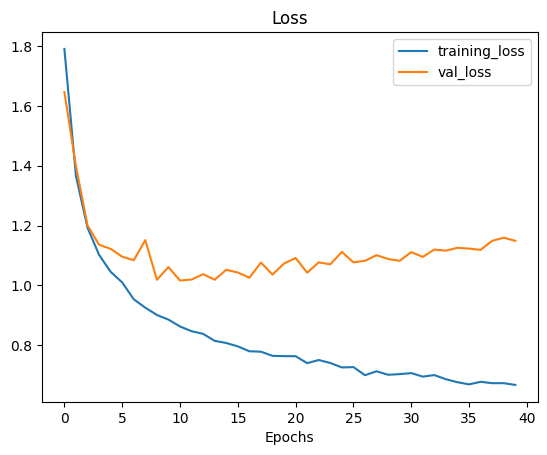

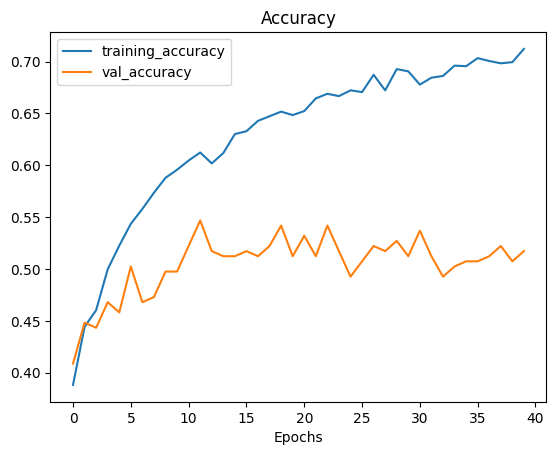

In [31]:

plot_loss_curves(history_0)


In [32]:
from sklearn.metrics import classification_report

# Assuming you have true labels for your test data stored in y_true
# and predictions from your model stored in y_pred

# Convert categorical predictions to class labels
y_pred_labels = np.argmax(model_0.predict(test_data), axis=1)

# Get true labels from the test dataset
y_true_labels = np.concatenate([y for x, y in test_data], axis=0)
y_true_labels = np.argmax(y_true_labels, axis=1)

# Generate classification report
report = classification_report(y_true_labels, y_pred_labels)

print(report)

7/7 [==============================] - 2s 147ms/step
              precision    recall  f1-score   support

           0       0.25      0.23      0.24        60
           1       0.30      0.23      0.26        66
           2       0.34      0.43      0.38        77

    accuracy                           0.31       203
   macro avg       0.30      0.30      0.29       203
weighted avg       0.30      0.31      0.30       203

